# Exploratory Data Analysis (EDA) on S&P 500
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [93]:
from matplotlib import rcParams
rcParams.update({
    'figure.figsize': [12,4],
    'figure.dpi'    : 150,
    'xtick.top'     : True,
    'xtick.bottom'  : True, 
    'ytick.left'    : True, 
    'ytick.right'   : True,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [80]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv('SP500.csv') #Dataset file
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')
df['DATE']  = pd.to_datetime(df['DATE'])
df = df.set_index('DATE') 

df.describe()

,SP500
count,2365.000000
mean,2888.873979
std,848.558749
min,1741.890000
25%,2101.490000
50%,2726.220000
75%,3640.470000
max,4796.560000


In [64]:
recess = pd.read_csv('../Index7/Recession.csv')

In [82]:
# min-max normalization
df['SP500'] = (df['SP500']-df['SP500'].min())/(df['SP500'].max()-df['SP500'].min())
df.describe()

,SP500
count,2365.000000
mean,0.375485
std,0.277791
min,0.000000
25%,0.117721
50%,0.322238
75%,0.621534
max,1.000000


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

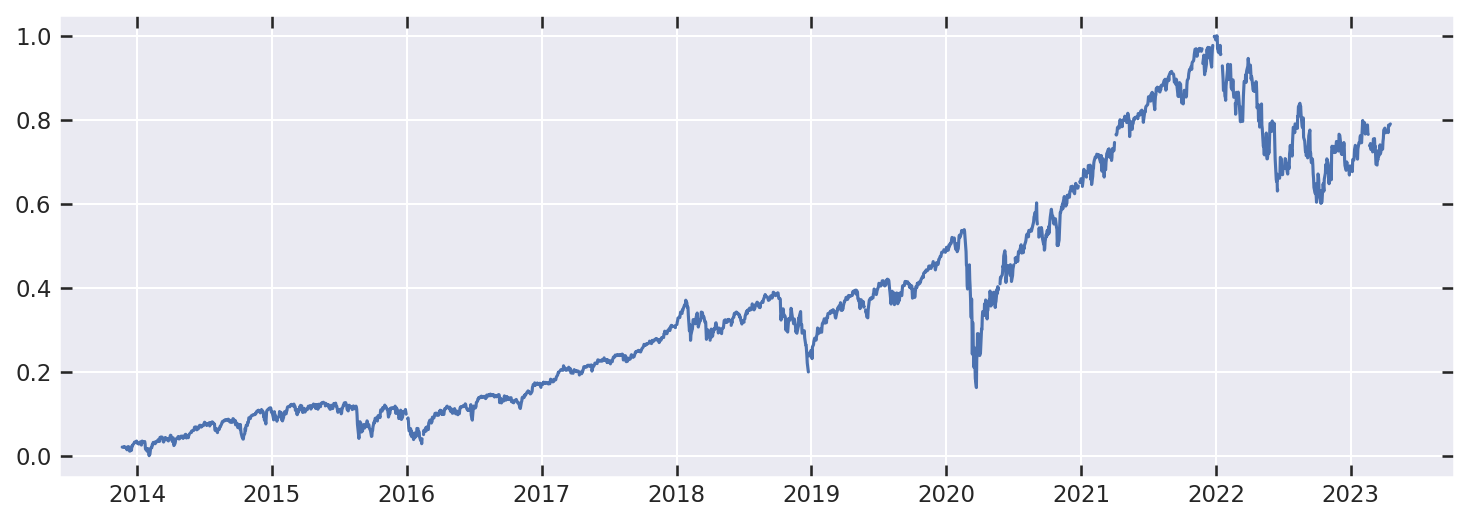

In [94]:
fig, ax = plt.subplots()
d = df
plt.plot(d)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

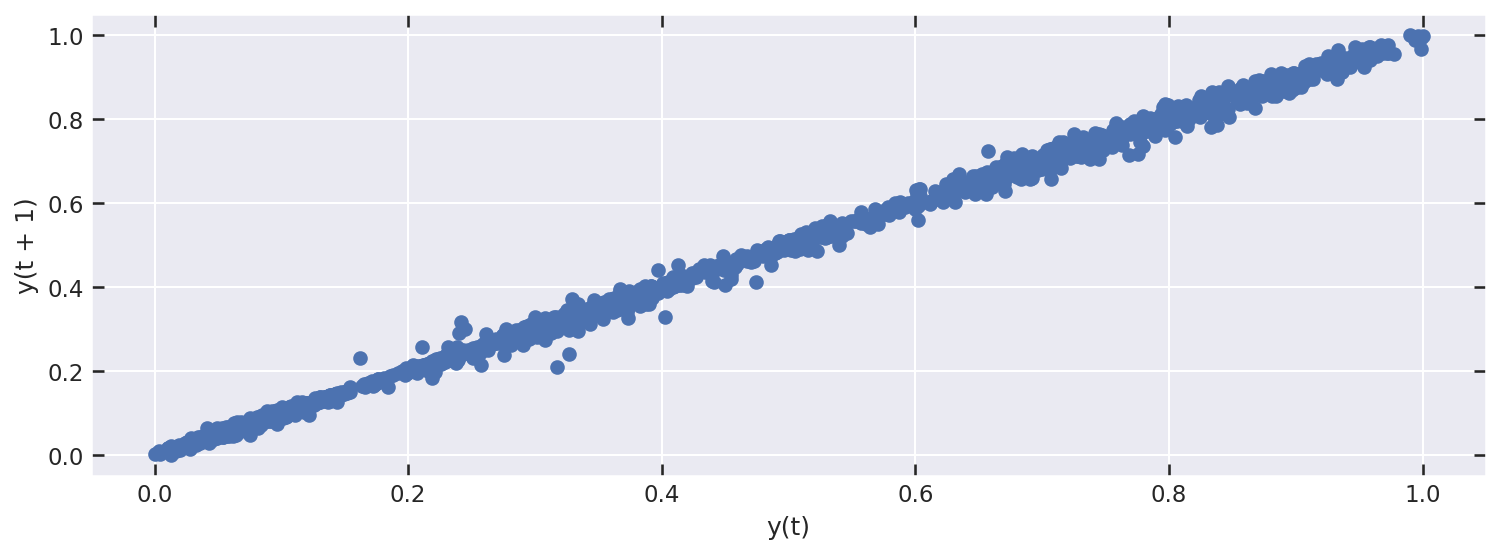

In [96]:
pd.plotting.lag_plot(df)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


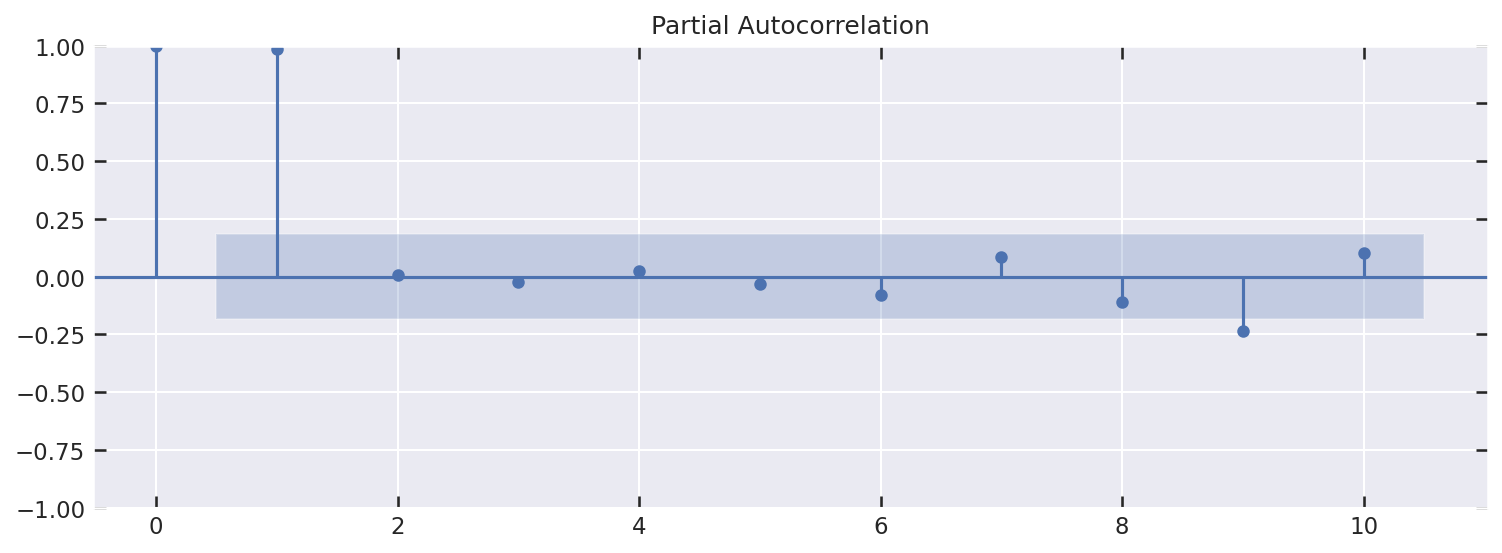

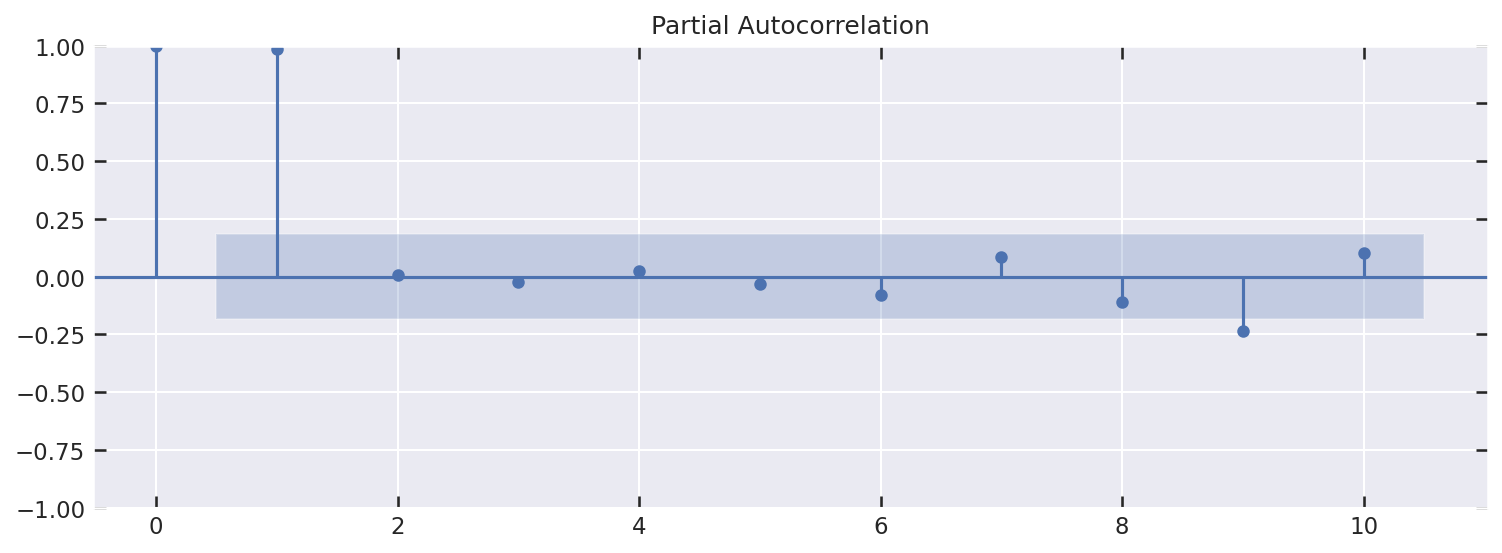

In [97]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_monthly, lags=10)

In [66]:
# df_weekly = df.resample('W').sum()
df_monthly = df.resample('M').mean()
df_quarterly = df.resample('Q').mean()
df_yearly = df.resample('Y').mean()

In [ ]:
df_monthly.plot(figsize = plotsize)
plt.show()

df_quarterly.plot(figsize = plotsize)
plt.show()

df_yearly.plot(figsize = plotsize)
plt.show()